# 03-classification-homework- California Housing Prices

### Import libraries

In [1]:
import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter
import os as os
import shutil as shutil
import wget

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score

### Get the Dataset : Hosuing Price

In [4]:
# Get California Housing Prices data from Kaggle.    
dataset_url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
dataset_filename = 'housing.csv'
dataset_filename_bk =  'housing_bk.csv'

# If file exists then take a backup and delete
if(os.path.isfile(dataset_filename) ):
    print(f'\nTaking backup and deleting already existing file: {dataset_filename}')
    shutil.copyfile(dataset_filename, dataset_filename_bk)
    #remove the file
    os.remove(dataset_filename)

# Download latest file
print(f'\nDownloading the file: {dataset_filename} , from {dataset_url}')
dataset_filename = wget.download(dataset_url)
print(f'\nDownloading the file: {dataset_filename} , Completed')


Taking backup and deleting already existing file: housing.csv

100% [..........................................................................] 1423529 / 1423529


### Exploratory Data Analysis (EDA)

In [5]:
house_full_df = pd.read_csv(dataset_filename)
house_df = house_full_df
nRow, nColumn = house_df.shape
print(f'There are {nRow} records and {nColumn} columns in the Housing dataset')

There are 20640 records and 10 columns in the Housing dataset


In [6]:
# Display column/feature data type
house_df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [7]:
# display initial few entries of data set
house_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
# Display Data information
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
# Display statistical information
house_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Look at the median_house_value variable. Does it have a long tail?

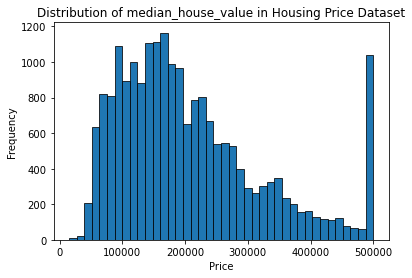

In [10]:
plt.figure(figsize=(6, 4))

sns.histplot(house_df.median_house_value, bins=40, alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of median_house_value in Housing Price Dataset')

plt.show()

Observation: Based on the above plot, "median_house_value" distribution is skewed to the left  and no long tail observed

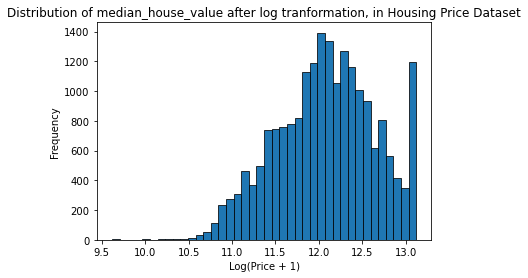

In [11]:
log_median_house_value = np.log1p(house_df.median_house_value)

plt.figure(figsize=(6, 4))

sns.histplot(log_median_house_value, bins=40, alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of median_house_value after log tranformation, in Housing Price Dataset')

plt.show()

Observation: Based on the above log plot, "median_house_value" distribution is normally distributed

### Feature Selection

For the rest of the homework, you'll need to use only these columns:

'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'
Select only them.

In [12]:
# Columns of interest
selective_columns = [   'latitude',
                        'longitude',
                        'housing_median_age',
                        'total_rooms',
                        'total_bedrooms',
                        'population',
                        'households',
                        'median_income',
                        'median_house_value',
                        'ocean_proximity']

In [13]:
# Filter selective columns
house_sel_df = house_df [selective_columns]

In [14]:
house_sel_df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Data preparation

In [15]:
# Check for Features with missing values
house_sel_df.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [16]:
# Select only the features from above and fill in the missing values with 0.
house_sel_df['total_bedrooms']=house_sel_df.total_bedrooms.fillna(0)

In [17]:
# Check for Features with missing values, after filling missing values with 0.
house_sel_df.isna().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [18]:
#Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.
house_sel_df['rooms_per_household']=house_sel_df.total_rooms / house_sel_df.households

In [19]:
#Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.
house_sel_df['bedrooms_per_room']=house_sel_df.total_bedrooms / house_sel_df.total_rooms

In [20]:
#Create a new column population_per_household by dividing the column population by the column households from dataframe.
house_sel_df['population_per_household']=house_sel_df.population / house_sel_df.households

### Question 1: What is the most frequent observation (mode) for the column ocean_proximity?

In [21]:
mode = house_sel_df['ocean_proximity'].mode()
print("Q1 Answer --> most frequent observation (mode) for the column ocean_proximity = ", mode)

Q1 Answer --> most frequent observation (mode) for the column ocean_proximity =  0    <1H OCEAN
Name: ocean_proximity, dtype: object


### Question 2: What are the two features that have the biggest correlation in this dataset?

In [22]:
# Display statistical information
house_sel_df.describe()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,35.631861,-119.569704,28.639486,2635.763081,532.476211,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.210902,3.070655
std,2.135952,2.003532,12.585558,2181.615252,422.678333,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.061473,10.386050
min,32.540000,-124.350000,1.000000,2.000000,0.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.000000,0.692308
25%,33.930000,-121.800000,18.000000,1447.750000,292.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.174539,2.429741
50%,34.260000,-118.490000,29.000000,2127.000000,431.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.202626,2.818116
75%,37.710000,-118.010000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239273,3.282261
max,41.950000,-114.310000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


In [23]:
nRow, nColumn = house_sel_df.shape
print(f'There are {nRow} records and {nColumn} columns in the Housing dataset')

There are 20640 records and 13 columns in the Housing dataset


<AxesSubplot:>

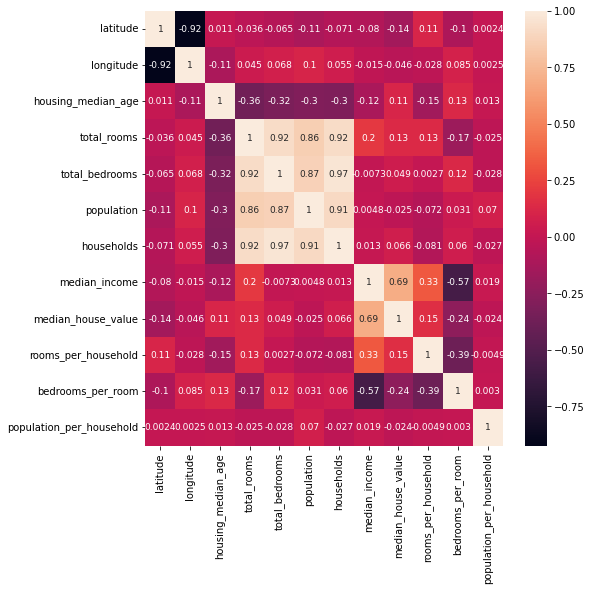

In [24]:
fig, ax = plt.subplots(figsize = (8,8))
sns.heatmap(house_sel_df.corr(),annot=True, annot_kws = {"size":9})

In [25]:
pd.set_option('display.max_rows', None)
house_sel_df.corr().unstack().sort_values(ascending = False)

latitude                  latitude                    1.000000
longitude                 longitude                   1.000000
bedrooms_per_room         bedrooms_per_room           1.000000
rooms_per_household       rooms_per_household         1.000000
median_house_value        median_house_value          1.000000
median_income             median_income               1.000000
households                households                  1.000000
population                population                  1.000000
total_bedrooms            total_bedrooms              1.000000
total_rooms               total_rooms                 1.000000
housing_median_age        housing_median_age          1.000000
population_per_household  population_per_household    1.000000
households                total_bedrooms              0.966507
total_bedrooms            households                  0.966507
total_rooms               total_bedrooms              0.920196
total_bedrooms            total_rooms                 0

In [26]:
print("Q2 Answer --> two features that have the biggest correlation in this dataset =  total_bedrooms and households ")

Q2 Answer --> two features that have the biggest correlation in this dataset =  total_bedrooms and households 


### Make median_house_value binary
We need to turn the median_house_value variable from numeric into binary.
Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.

In [27]:
house_data  = house_sel_df.copy()
mean = house_data['median_house_value'].mean()

house_data['above_average'] = np.where(house_data['median_house_value']>=mean,1,0)

## Split the data

In [28]:

# Split Hosuing data in train:val:test set in the ratio: 60%:20%:20% 
df_full_train, df_test = train_test_split(house_data, test_size=0.20, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

# Reser all Index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
print(f' Length of Training, Validation, Test Data sets are {len(df_train)} ,{len(df_val)} ,{len(df_test)}')

 Length of Training, Validation, Test Data sets are 12384 ,4128 ,4128


## Question 3

In [29]:
mis = mutual_info_score(df_train.above_average, df_train.ocean_proximity)
print(f"Q3 Answer --> mutual information score score between above_average and ocean_proximity is: {mis} / {round(mis,2)} " )

Q3 Answer --> mutual information score score between above_average and ocean_proximity is: 0.10138385763624205 / 0.1 


## Question 4

In [30]:
from sklearn.feature_extraction import DictVectorizer
# Select target value (median_house_value)
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [31]:
df_train = df_train.drop(['median_house_value', 'above_average'], axis=1)
df_val= df_val.drop(['median_house_value', 'above_average'], axis=1)
df_test = df_test.drop(['median_house_value', 'above_average'], axis=1)

In [32]:
# One-hot encoding

dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
val_dict = df_val.to_dict(orient='records')
test_dict = df_test.to_dict(orient='records')

dv.fit(train_dict)

X_train = dv.transform(train_dict)
X_val = dv.transform(val_dict)
X_test = dv.transform(test_dict)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [34]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [35]:
accuracy = model.score(X_val, y_val)
print(f"Q4 Answer --> accuracy on the validation dataset and round it to 2 decimal digits: {accuracy} / {round(accuracy,2)} " )

Q4 Answer --> accuracy on the validation dataset and round it to 2 decimal digits: 0.8364825581395349 / 0.84 


## Question 5

In [36]:
model_coeffs = dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))
model_coeffs

{'bedrooms_per_room': 0.341,
 'households': 0.004,
 'housing_median_age': 0.036,
 'latitude': 0.13,
 'longitude': 0.092,
 'median_income': 1.216,
 'ocean_proximity=<1H OCEAN': 0.475,
 'ocean_proximity=INLAND': -1.762,
 'ocean_proximity=ISLAND': 0.035,
 'ocean_proximity=NEAR BAY': 0.229,
 'ocean_proximity=NEAR OCEAN': 0.891,
 'population': -0.002,
 'population_per_household': 0.01,
 'rooms_per_household': -0.01,
 'total_bedrooms': 0.002,
 'total_rooms': -0.0}

In [37]:
model_coeffs_dict = dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))
model_coeffs_list = sorted(model_coeffs.items(), key=lambda x:x[1])
model_coeffs_dict_sorted = dict(model_coeffs_list)
model_coeffs_dict_sorted

{'ocean_proximity=INLAND': -1.762,
 'rooms_per_household': -0.01,
 'population': -0.002,
 'total_rooms': -0.0,
 'total_bedrooms': 0.002,
 'households': 0.004,
 'population_per_household': 0.01,
 'ocean_proximity=ISLAND': 0.035,
 'housing_median_age': 0.036,
 'longitude': 0.092,
 'latitude': 0.13,
 'ocean_proximity=NEAR BAY': 0.229,
 'bedrooms_per_room': 0.341,
 'ocean_proximity=<1H OCEAN': 0.475,
 'ocean_proximity=NEAR OCEAN': 0.891,
 'median_income': 1.216}

In [38]:
luf = ['total_rooms',
                'total_bedrooms',
                'population',
                'households']

In [40]:
X_train_least = df_train[luf]
X_val_least = df_val[luf]

model_least = LogisticRegression(solver="liblinear",
                                 C=1.0,
                                 max_iter=1000,
                                 random_state=42)

model_least.fit(X_train_least, y_train)

preds = model_least.predict(X_val_least)

luf_acc = accuracy_score(y_val, preds)

print("Accuracy with least useful features:", np.round(luf_acc, 3))

Accuracy with least useful features: 0.71


In [41]:
for f in luf:
    print(f"{f} is removed")
    luf_exclude = luf.copy()
    luf_exclude.remove(f)

    X_train_exclude = df_train[luf_exclude]
    X_val_exclude = df_val[luf_exclude]

    model_least = LogisticRegression(solver="liblinear",
                                 C=1.0,
                                 max_iter=1000,
                                 random_state=42)

    model_least.fit(X_train_exclude, y_train)

    preds = model_least.predict(X_val_exclude)

    luf_exclude_acc = accuracy_score(y_val, preds)

    print(f"                       Accuracy without-{f} is = {np.round(luf_exclude_acc, 3)}, \
    Difference in Acc : {np.round(luf_acc-luf_exclude_acc,3)}:", )

total_rooms is removed
                       Accuracy without-total_rooms is = 0.628,     Difference in Acc : 0.082:
total_bedrooms is removed
                       Accuracy without-total_bedrooms is = 0.661,     Difference in Acc : 0.049:
population is removed
                       Accuracy without-population is = 0.657,     Difference in Acc : 0.053:
households is removed
                       Accuracy without-households is = 0.672,     Difference in Acc : 0.038:


In [42]:
print(f"Q5 Answer --> Which of following feature has the smallest difference: households  " )

Q5 Answer --> Which of following feature has the smallest difference: households  


## Question 6